In [62]:
import numpy as np
from scipy import signal
import scipy.io.wavfile
import matplotlib.pyplot as plt
import math
from IPython.display import Audio
from scipy.sparse import csr_matrix
from IPython.display import display, Markdown

In [63]:
sourceFilesPrefix="ExpectedResults//speech-"

rate1, sample1_data = scipy.io.wavfile.read(sourceFilesPrefix+"1.wav")
rate2, sample2_data=scipy.io.wavfile.read(sourceFilesPrefix+"2.wav")

In [64]:
def sigmoid(y):
    g=np.divide(1,np.add(1,np.exp(-y)))
    return g

def gradient(eta, Y, W):
    Z=sigmoid(Y)
    Id=np.identity(Y.shape[0])
    grad=eta*(Id+np.dot((1-2*Z),Y.T))*W
    # la cost se adauga 1/norma de W, 
    # se schimba gradientul pentru noua expresie
    return grad

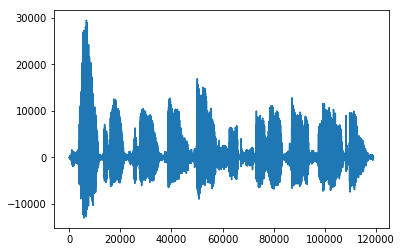

In [65]:
plt.figure()
plt.plot(sample1_data)
plt.show()
Audio(data=sample1_data, rate=16000)

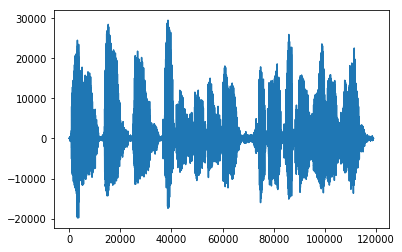

In [66]:
plt.figure()
plt.plot(sample2_data)
plt.show()
Audio(data=sample2_data, rate=16000)

In [67]:
med1=sample1_data.std(axis=0)
s1data= sample1_data/med1
med2=sample2_data.std(axis=0)
s2data=sample2_data/med2
orig=np.matrix([s1data,s2data])

print("Correlation coefficient - original data \n" + str(np.corrcoef(orig)))

n=len(orig)
#A=np.random.random([n,n])
A=np.matrix([[0.15270211,0.8406566],
             [0.90514896,0.53725471]])
print("Mixing matrix: \n"+str(A))

X=np.dot(A,orig)
print("Correlation coefficient - mixed data \n" + str(np.corrcoef(X)))

Correlation coefficient - original data 
[[ 1.         -0.00423728]
 [-0.00423728  1.        ]]
Mixing matrix: 
[[ 0.15270211  0.8406566 ]
 [ 0.90514896  0.53725471]]
Correlation coefficient - mixed data 
[[ 1.          0.65361556]
 [ 0.65361556  1.        ]]


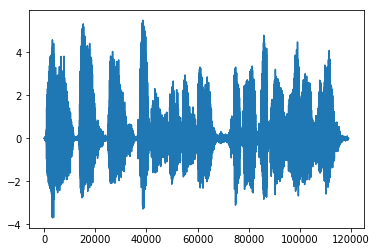

In [68]:
plt.figure()
plt.plot(X[0].T)
plt.show()
Audio(data=X[0], rate=16000)

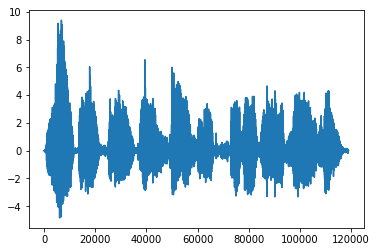

In [69]:
plt.figure()
plt.plot(X[1].T)
plt.show()
Audio(data=X[1], rate=16000)

In [70]:
corr=1
while abs(corr)>=2e-7:
    eta=0.01
    eta0=eta
    T=1000
    num_iter=10000

    W=np.random.uniform(0.001,0.01,(n,n))
    print("Initial guessed decomposition matrix: \n"+str(W))
    for i in range(0,num_iter):
        Y=np.dot(W,X)
        delW=gradient(eta,Y,W)
        W+=delW
        
        eta=eta0/(1+(i/T))
    Y2=np.dot(W,X)
    corr=np.corrcoef(Y2)[1][0]
    print('Correlation coefficient: \n',corr)

Initial guessed decomposition matrix: 
[[ 0.00180095  0.00256171]
 [ 0.00221447  0.00103921]]
-1.09444970506e-06
Initial guessed decomposition matrix: 
[[ 0.00643702  0.00413879]
 [ 0.00565054  0.00847479]]
-1.01352158888e-06
Initial guessed decomposition matrix: 
[[ 0.00975568  0.00620642]
 [ 0.00600439  0.00306564]]
-1.4464246018e-06
Initial guessed decomposition matrix: 
[[ 0.00754639  0.00235068]
 [ 0.00422171  0.00810736]]
-1.04312544356e-06
Initial guessed decomposition matrix: 
[[ 0.00706347  0.00232038]
 [ 0.00141123  0.0016754 ]]
1.31364772141e-07


In [71]:
print('Final decomposition matrix: \n',W)
Y2=np.dot(W,X)

Final decomposition matrix: 
 [[ 0.00503043 -0.00029339]
 [-0.00386738  0.00514801]]


# Second recovered signal

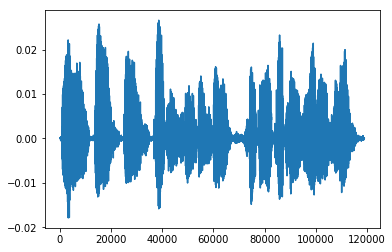

In [72]:
display(Markdown("# Second recovered signal"))
plt.figure()
plt.plot(Y2[0].T)
plt.show()
Audio(data=Y2[0], rate=16000)

# Second recovered signal

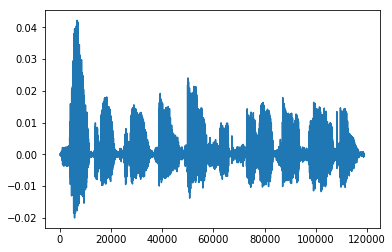

In [73]:
display(Markdown("# Second recovered signal"))
plt.figure()
plt.plot(Y2[1].T)
plt.show()
Audio(data=Y2[1], rate=16000)